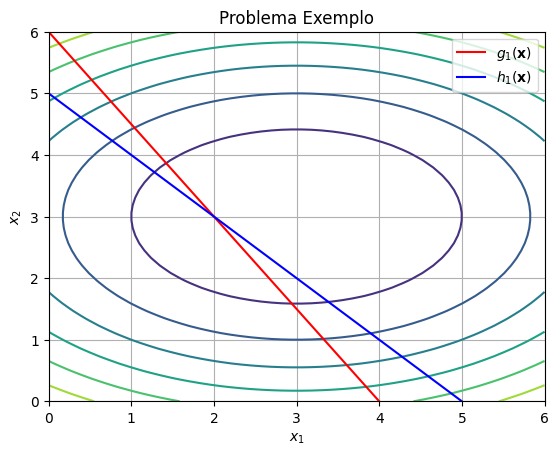

C:\Users\NTC-01\AppData\Local\Temp\ipykernel_8272\4227688934.py:88: RuntimeWarning: invalid value encountered in divide
  if np.linalg.norm((xopt-xlast)/xopt) < precisao:
C:\Users\NTC-01\AppData\Local\Temp\ipykernel_8272\4227688934.py:88: RuntimeWarning: invalid value encountered in divide
  if np.linalg.norm((xopt-xlast)/xopt) < precisao:
C:\Users\NTC-01\AppData\Local\Temp\ipykernel_8272\4227688934.py:88: RuntimeWarning: invalid value encountered in divide
  if np.linalg.norm((xopt-xlast)/xopt) < precisao:
C:\Users\NTC-01\AppData\Local\Temp\ipykernel_8272\4227688934.py:88: RuntimeWarning: invalid value encountered in divide
  if np.linalg.norm((xopt-xlast)/xopt) < precisao:
C:\Users\NTC-01\AppData\Local\Temp\ipykernel_8272\4227688934.py:88: RuntimeWarning: invalid value encountered in divide
  if np.linalg.norm((xopt-xlast)/xopt) < precisao:
C:\Users\NTC-01\AppData\Local\Temp\ipykernel_8272\4227688934.py:88: RuntimeWarning: invalid value encountered in divide
  if np.linalg.norm((xopt

KeyboardInterrupt: 

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize


"""
        DEFINIÇÃO DO PROBLEMA DE OTIMIZAÇÃO
        
        min f(x1, x2) = (x1-3)^2 + 2*(x2-3)^2
        sujeito a:
            g1(x1, x2): 3*x1 + 2*x2 <= 12
            h1(x1, x2): x1 + x2 = 5

        APLICAÇÃO DO MÉTODO DA PENALIDADE EXTERNA
        
        min f~(x1, x2) = (x1-3)^2 + 2*(x2-3)^2
                        + u*max(0, 3*x1 + 2*x2 - 12)^2 
                        + u*(x1 + x2 - 5)^2

"""


# Definição da malha de pontos
x1, x2 = np.meshgrid(np.linspace(0, 6),
                     np.linspace(0, 6))

# Calcula f(x) e exibe gráfico de contorno
f = (x1-3)**2 + 2*(x2-3)**2
plt.contour(x1, x2, f)

# Calcula g e exibe restrição
x1 = np.linspace(0, 6)
g1 = (12-3*x1)/2
plt.plot(x1, g1, 'r', label=r'$g_1(\mathbf{x})$')

# Calcula h e exibe restrição
x1 = np.linspace(0, 6)
h1 = 5-x1
plt.plot(x1, h1, 'b', label=r'$h_1(\mathbf{x})$')

# Outros parâmetros da figura
plt.xlim([0., 6.])
plt.ylim([0., 6.])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Problema Exemplo')
plt.legend()
plt.grid()
plt.show()

# Parâmetros
precisao = 1e-2 # Precisão: percentual de diferença de x entre duas gerações
u = 1. # Valor inicial de u
alpha = 1.5 # Aceleração do valor de u
xlast = np.inf*np.ones(2) # Último valor de u
iteracoes = 1 # Contador de iterações

while True:
    
    # Define a nova função-objetivo
    def fh(vars):
        x1, x2 = vars[0], vars[1]
        return (x1-3.)**2 + 2*(x2-3.)**2 + u*max(0, 3*x1 + 2*x2 - 12.)**2 + u*(x1 + x2 - 5.)**2
    
    # Ponto inicial
    x0 = np.array([0, 0], dtype=float)
    
    # Determina o ponto de ótimo através de um método de otimização irrestrita
    solution = optimize.minimize(fh, x0, method='BFGS')
    xopt = solution.x
    fopt = solution.fun
    
    # Se o percentual de diferença entre os dois últimos ótimos forem muito pequenos, pare
    if np.linalg.norm((xopt-xlast)/xopt) < precisao:
        break
    
    # Senão, aumente u
    else:
        xlast = xopt
        u = alpha*u
        iteracoes += 1

# Exibe resultado
print('RESULTADO')
print('x-ótimo: ' + str(xopt))
print('f(x-ótimo): %.3f' %fopt)
print('Valor final de u: %.1f' % u)
print('Número de iterações: %d' % iteracoes)